<a href="https://colab.research.google.com/github/nguyenhieu-09/machine-learning/blob/main/H%E1%BB%8Dc_m%C3%A1y_Nh%C3%B3m_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Preprocessing Steps**


**1 | Import Libraries**

In [1]:
# Following Libraries are being used
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model #For missing values
from sklearn.preprocessing import StandardScaler #For scaling features

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor #Random Forest Regressor
from sklearn.ensemble import BaggingRegressor #Bagging Regressor
from sklearn.neighbors import KNeighborsRegressor #KNN Regressor
from sklearn.linear_model import LinearRegression #Linear Regressor

**2 | Import Files**

In [2]:
# Tải dữ liệu
df = pd.read_csv('/content/googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


**Dataframe Investigation**

In [3]:
# Kiểm tra kích thước của dữ liệu
df.shape

(10841, 13)

In [4]:
# miêu tả
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [5]:
# Kiểm tra kiểu dữ liệu
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

 **Sắp xếp và tiền xử lý dữ liệu**
 Các bước thực hiện trong quá trình tiền xử lý như sau:

Tìm giá trị Null hoặc Thiếu

Thay đổi loại dữ liệu của các tính năng, nếu được yêu cầu

Mã hóa dữ liệu của các tính năng phân loại

Xử lý các giá trị Null hoặc Thiếu


In [6]:
# Bỏ đi các cột không sử dụng
df = df.drop(columns=[ 'Last Updated', 'Current Ver', 'Android Ver'])

In [7]:
# Kiểm tra các giá trị còn thiếu trong từng cột dữ liệu huấn luyện
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
dtype: int64

In [8]:
# Kiểm tra bản ghi nào có xếp hạng> 5 không
df[df['Rating'] > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,11-Feb-18


In [9]:
rec = df[df['Category'] == '1.9'].index
df = df.drop(rec)

In [10]:
#Tạo một bản sao của DataFrame và lưu trữ trong train_data
train_data = df.copy()

In [11]:
# Xử lý cột "Giá"
train_data['Price'] = train_data['Price'].apply(lambda x : x.strip('$'))
# Xử lý cột "Cài đặt"
train_data['Installs'] = train_data['Installs'].apply(lambda x : x.strip('+').replace(',', ''))

In [12]:
# Chuyển đổi sang kiểu dữ liệu float
train_data['Price'] = train_data['Price'].astype(float)
train_data['Installs'] = train_data['Installs'].astype(float)
train_data['Reviews'] = train_data['Reviews'].astype(float)

In [13]:
# Sẽ không chứa bất kỳ bản ghi nào có giá trị NaN trong cột 'Type'.
rec = train_data[train_data['Type'].isnull()].index
train_data = train_data.drop(rec)

In [14]:
#  lưu trữ tất cả các cột có kiểu dữ liệu 'object'
col_list = [c for c in train_data.columns if train_data[c].dtype == 'object']
col_list

['App', 'Category', 'Size', 'Type', 'Content Rating', 'Genres']

In [15]:
# Mã hóa các tính năng ngoại trừ "size"
for c in col_list:
    if c != 'Size':
        train_data[c] = train_data[c].astype('category')
        train_data[c] = train_data[c].cat.codes

In [16]:
# Chuyển đổi các biến phân loại thành dạng số
print(df['Type'].unique().tolist())
print(train_data['Type'].unique().tolist(), '\n')

['Free', 'Paid', nan]
[0, 1] 



In [17]:
# để xác định rõ ràng rằng giá trị "Varies with device" trong cột 'Size' sẽ được coi như giá trị thiếu (null)
train_data.loc[train_data['Size'] == 'Varies with device', 'Size'] = np.nan

In [18]:
# Loại bỏ hậu tố: Xóa hậu tố 'k' hoặc 'M' từ các giá trị trong cột 'Size'.
# Chuyển đổi kiểu dữ liệu: Chuyển đổi các giá trị trong cột 'Size' thành kiểu dữ liệu float.
# Trích xuất hậu tố: Trích xuất hậu tố 'k' hoặc 'M' từ các giá trị trong cột 'Size'.
# Xử lý giá trị None: Thay thế các giá trị None (nếu có) bằng giá trị 1.0 để giữ lại giá trị mặc định.
# Chuyển đổi đơn vị: Thay thế 'k' bằng 10^3 và 'M' bằng 10^6, biến đổi các giá trị thành đơn vị bytes.
# Chuyển đổi kiểu số nguyên: Chuyển đổi tất cả các giá trị trong cột 'Size' thành kiểu số nguyên.
# Gán lại giá trị: Gán lại cột 'Size' trong DataFrame train_data với giá trị đã được xử lý.
train_data.Size = (train_data.Size.replace(r'[kM]+$', '', regex=True).astype(float) * \
             train_data.Size.str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1)
            .replace(['k','M'], [10**3, 10**6]).astype(int))

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
dtype: int64


<Axes: >

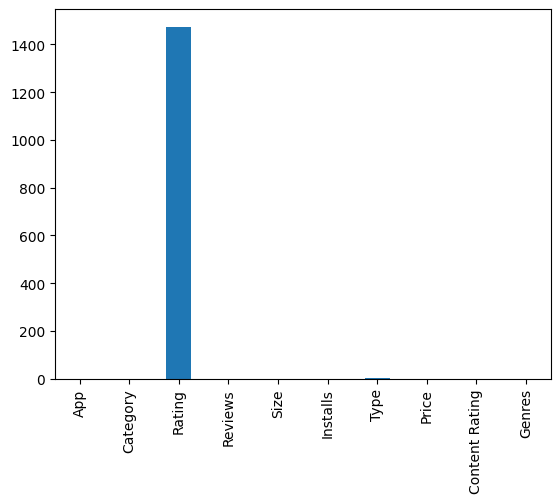

In [19]:
print (df.isna().sum())
df.isna().sum().plot(kind = 'bar')

Vì kích thước và xếp hạng có số lượng lớn các giá trị bị thiếu nên sẽ không phải là cách tiếp cận tốt để điền chúng bằng giá trị trung bình hoặc giá trị trung bình nên tôi sử dụng mô hình hồi quy tuyến tính để điền vào các giá trị còn thiếu này.

In [20]:
df.dropna (thresh = 10, inplace=True)
print (df.isna().sum())

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
dtype: int64


In [21]:
# Điền các giá trị còn thiếu trong cột 'Size' bằng cách sử dụng mô hình hồi quy tuyến tính
X = train_data[train_data['Size'].notnull()]
y = train_data.loc[train_data['Size'].notnull(), 'Size']
X = X.drop(columns=['Size', 'Rating'])


model = linear_model.LinearRegression()
model.fit(X, y)


X_miss = train_data[train_data['Size'].isnull()]
X_miss = X_miss.drop(columns = ['Size', 'Rating'])


train_data.loc[train_data['Size'].isnull(), 'Size'] = model.predict(X_miss)

In [22]:
# điền các giá trị còn thiếu trong cột 'Rating' bằng cách sử dụng mô hình hồi quy tuyến tính
X = train_data[train_data['Rating'].notnull()]
y = train_data.loc[train_data['Rating'].notnull(), 'Rating']
X = X.drop(columns=['Rating'])


model = linear_model.LinearRegression()
model.fit(X, y)


X_miss = train_data[train_data['Rating'].isnull()]
X_miss = X_miss.drop(columns = ['Rating'])


train_data.loc[train_data['Rating'].isnull(), 'Rating'] = model.predict(X_miss)

In [23]:
train_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
dtype: int64

In [24]:
train_data.dtypes

App                 int16
Category             int8
Rating            float64
Reviews           float64
Size              float64
Installs          float64
Type                 int8
Price             float64
Content Rating       int8
Genres               int8
dtype: object

In [25]:
train_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,6961,0,4.1,159.0,19000000.0,10000.0,0,0.0,1,9
1,2632,0,3.9,967.0,14000000.0,500000.0,0,0.0,1,12
2,8655,0,4.7,87510.0,8700000.0,5000000.0,0,0.0,1,9
3,7826,0,4.5,215644.0,25000000.0,50000000.0,0,0.0,4,9
4,7021,0,4.3,967.0,2800000.0,100000.0,0,0.0,1,11


**Data visualization**

<Axes: >

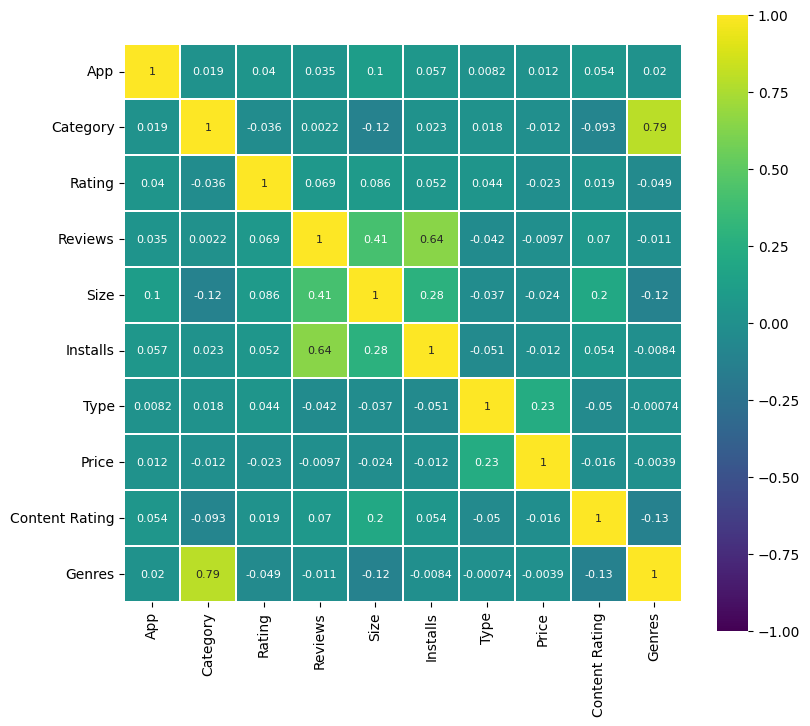

In [26]:
corr = train_data.corr()
plt.figure(figsize=(9, 8))

sns.heatmap(corr[(corr >= 0) | (corr <= 0)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)

Text(0.5, 1.0, 'Phân phối xếp hạng')

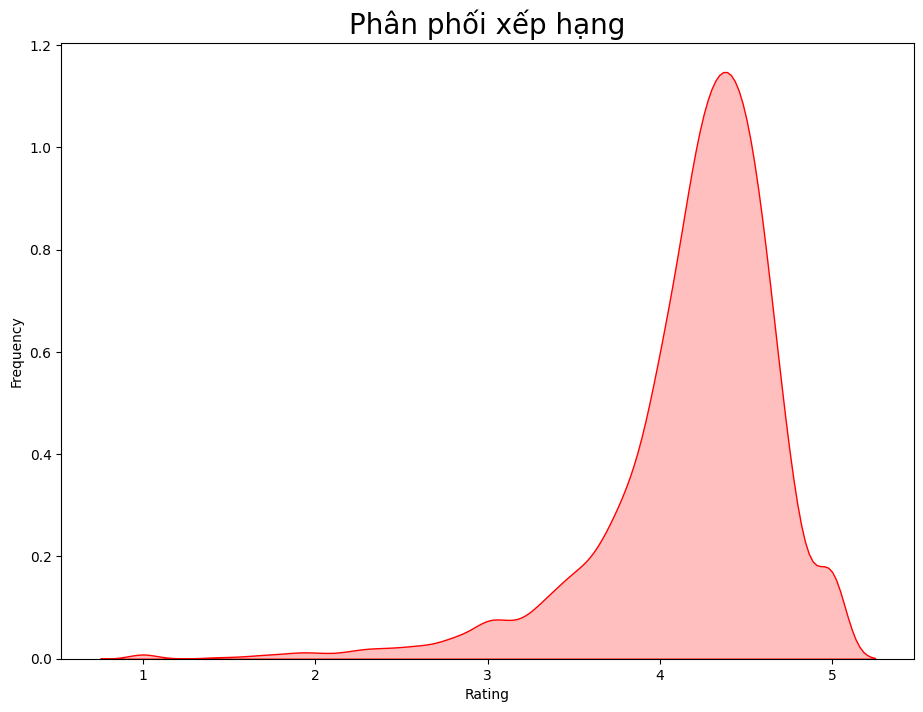

In [27]:
# Tắt cảnh báo để làm sạch hơn khi hiển thị biểu đồ
warnings.filterwarnings('ignore')

# Thiết lập kích thước của biểu đồ
rcParams['figure.figsize'] = 11, 8

# Vẽ Kernel Density Estimate (KDE) plot cho cột 'Rating' trong DataFrame 'df'
g = sns.kdeplot(df.Rating, color="Red", shade=True)

# Đặt nhãn cho trục x và y của biểu đồ
g.set_xlabel("Rating")
g.set_ylabel("Frequency")

# Đặt tiêu đề cho biểu đồ
plt.title('Phân phối xếp hạng', size=20)

phân phối xem đánh giá app được thể hiện ở mức nào trong các mức được chia ra trong dữ liệu 1,2,3,4,5

**Categorical Variable**

<Axes: title={'center': 'Số lượng của mỗi lớp'}, xlabel='Rating', ylabel='count'>

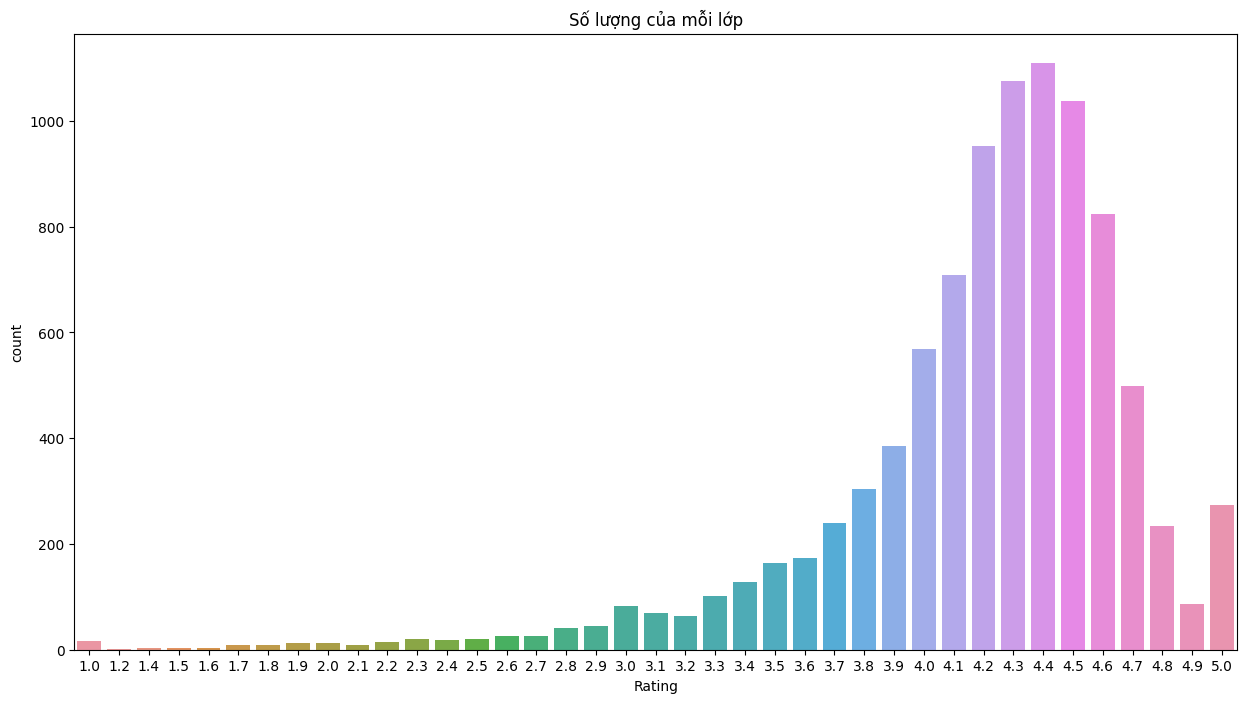

In [28]:
# phân loại ra tỉ lệ đánh giá
# Thiết lập kích thước của biểu đồ
plt.figure(figsize=(15, 8))

# Đặt tiêu đề cho biểu đồ
plt.title('Số lượng của mỗi lớp')

# Vẽ biểu đồ đếm sự xuất hiện của mỗi giá trị trong cột 'Rating'
sns.countplot(data=df, x='Rating')

Mục tiêu của biểu đồ này có thể là hiển thị phân phối của các đánh giá (Rating) trong dữ liệu và giúp người đọc có cái nhìn tổng quan về sự phân bố của chúng.

tỉ lệ đánh giá cao nhất ở đây là 4.4 , đánh giá thấp nhất là 1.2

In [29]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity


In [30]:
# Lọc DataFrame để chỉ lấy các dòng có giá trị 'Rating' là 4.4
filtered_apps = df[df['Rating'] == 4.4]

# In ra thông tin về các ứng dụng có đánh giá là 4.4
print(filtered_apps[['App', 'Rating']])


                                                   App  Rating
5                           Paper flowers instructions     4.4
8                                 Garden Coloring Book     4.4
10                             Text on Photo - Fonteee     4.4
11             Name Art Photo Editor - Focus n Filters     4.4
14     3D Color Pixel by Number - Sandbox Art Coloring     4.4
...                                                ...     ...
10720               Firefox Focus: The privacy browser     4.4
10726                                  Thumbnail Maker     4.4
10756                 FreedomPop Friends for Free Data     4.4
10760                                  Fast Tract Diet     4.4
10793                                        Sid Story     4.4

[1109 rows x 2 columns]


Sau khi tìm được tỉ lệ đánh giá cao nhất thì chúng ta dễ dàng tìm kiếm những  app được đánh giá nhiều nhất ở mức tỉ lệ là 4.4

**Average apps in the store**

Text(0.5, 1.0, 'Số lượng ứng dụng trong mỗi danh mục')

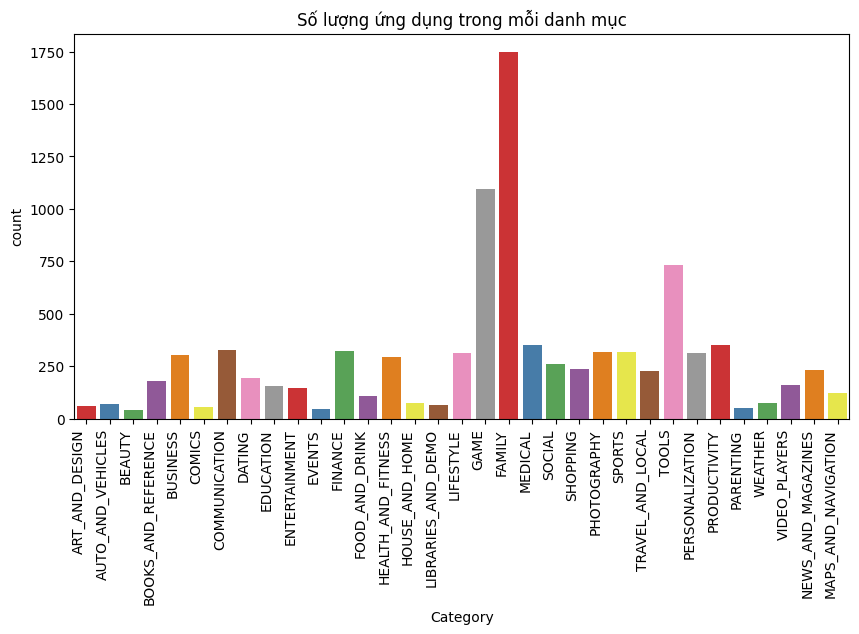

In [31]:

plt.figure(figsize=(10, 5))
g = sns.countplot(x="Category",data=df, palette = "Set1")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g
plt.title('Số lượng ứng dụng trong mỗi danh mục')

Danh mục Game và Gia đình  xuất hiện nhiều nhất trong cửa hàng

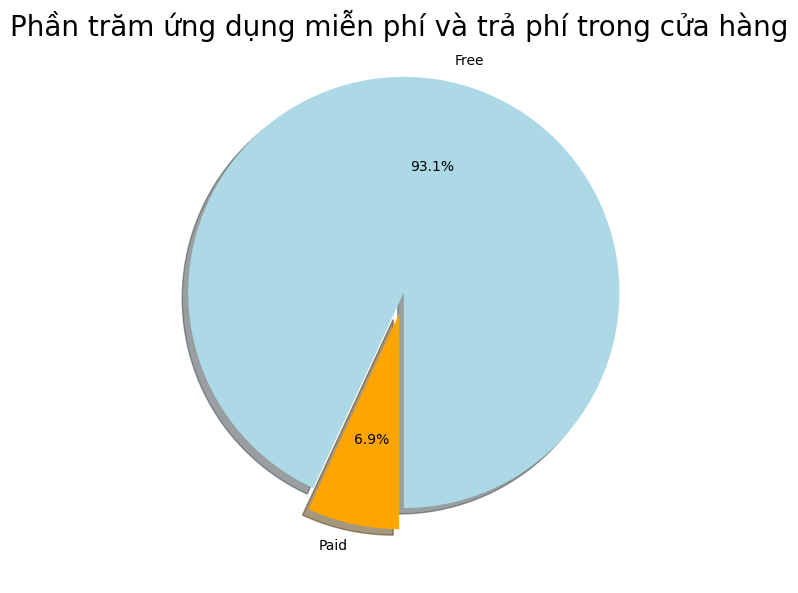

In [32]:

labels =df['Type'].value_counts(sort = True).index
sizes = df['Type'].value_counts(sort = True)


colors = ["lightblue","orange"]
explode = (0.1,0)  # explode 1st slice

rcParams['figure.figsize'] = 7,7
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)

plt.title('Phần trăm ứng dụng miễn phí và trả phí trong cửa hàng',size = 20)
plt.show()


In [33]:
# Chuẩn hóa dữ liệu
# Chọn Cột để Không Chuẩn Hóa:
cols = ['Category', 'Type', 'Content Rating', 'Genres', 'Rating']

# Chọn Các Cột Cần Chuẩn Hóa
columns = [c for c in train_data.columns if c not in cols]
scaler = StandardScaler()
scaler.fit(train_data[columns])
train_data[columns] = scaler.transform(train_data[columns])

#Kiểm tra dữ liệu sau khi chuẩn hóan
train_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,0.741022,0,4.1,-0.151664,-0.142952,-0.181770,0,-0.064419,1,9
1,-0.815556,0,3.9,-0.151388,-0.367923,-0.176007,0,-0.064419,1,12
2,1.350134,0,4.7,-0.121828,-0.606391,-0.123084,0,-0.064419,1,9
3,1.052051,0,4.5,-0.078063,0.127012,0.406145,0,-0.064419,4,9
4,0.762597,0,4.3,-0.151388,-0.871856,-0.180712,0,-0.064419,1,11


In [34]:
# chia dữ liệu thành tập huấn luyện và tập kiểm tra
# Xác định Biến Phụ Thuộc và Độc Lập:
y = train_data['Rating']
X = train_data.drop(columns=['Rating'])
# Chia Dữ Liệu:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# In Kích Thước của Tập Huấn Luyện và Tập Kiểm Tra:
print("Training Set Dimensions:", X_train.shape)
print("Validation Set Dimensions:", X_test.shape)

Training Set Dimensions: (8671, 9)
Validation Set Dimensions: (2168, 9)


Tập huấn luyện (Training Set) có kích thước là 8671 dòng và 8 cột. Điều này có nghĩa là có 8671 mẫu dữ liệu được sử dụng để đào tạo mô hình, và mỗi mẫu có 8 đặc trưng (hoặc biến độc lập).

Tập kiểm tra (Validation Set) có kích thước là 2168 dòng và 8 cột. Điều này có nghĩa là có 2168 mẫu dữ liệu được sử dụng để kiểm tra hiệu suất của mô hình, và mỗi mẫu cũng có 8 đặc trưng.

**Random Forest Regressor**

In [35]:
# Tạo và Đào Tạo Mô Hình:
randomf = RandomForestRegressor(n_estimators=300)
randomf.fit(X_train, y_train)

# In giá trị Bình phương Sai trung bình cho tập Huấn luyện
mse_train = mean_squared_error(y_train, randomf.predict(X_train))
print('Bình phương Sai trung bình cho Tập Huấn luyện:', mse_train)

# In giá trị Bình phương Sai trung bình cho tập Kiểm tra
mse_test = mean_squared_error(y_test, randomf.predict(X_test))
print('Bình phương Sai trung bình cho Tập Kiểm tra:', mse_test)
plt.show()

Bình phương Sai trung bình cho Tập Huấn luyện: 0.026640357920582506
Bình phương Sai trung bình cho Tập Kiểm tra: 0.188514379769875


Mô hình sau đó được đào tạo trên tập huấn luyện (X_train, y_train), nơi mà nó học từ dữ liệu để có thể dự đoán giá trị y (trong trường hợp này, là 'Rating') dựa trên các đặc trưng X.

feature: App = 0.2377397893279316
feature: Category = 0.07748416851709578
feature: Reviews = 0.27465417193232144
feature: Size = 0.19906317199137238
feature: Installs = 0.0803153064449042
feature: Type = 0.004034417294759407
feature: Price = 0.020993792323264565
feature: Content Rating = 0.02097176163780178
feature: Genres = 0.0847434205305489


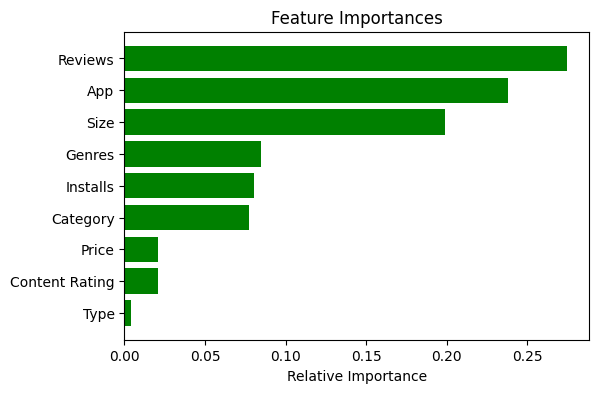

In [36]:
# In ra độ quan trọng của các đặc trưng:
for name, importance in zip(X.columns, randomf.feature_importances_):
    print('feature:', name, "=", importance)

importances = randomf.feature_importances_
indices = np.argsort(importances)
features = X.columns
plt.figure(figsize=(6, 4))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Các giá trị trên thể hiện phần trăm đóng góp của mỗi đặc trưng vào quyết định của mô hình. Nhìn chung, có vẻ như Reviews, Size, và Genres đóng góp nhiều nhất vào quyết định của mô hình, trong khi Type và Price có đóng góp thấp hơn.

**KNN Regressor**

In [37]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Tạo mô hình KNN Regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Đào tạo mô hình
knn_regressor.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_knn = knn_regressor.predict(X_test)

# Đánh giá hiệu suất bằng MSE
mse_knn = mean_squared_error(y_test, y_pred_knn)
print('Bình phương Sai trung bình cho KNN Regressor (tập kiểm tra):', mse_knn)



Bình phương Sai trung bình cho KNN Regressor (tập kiểm tra): 0.23695045059180853


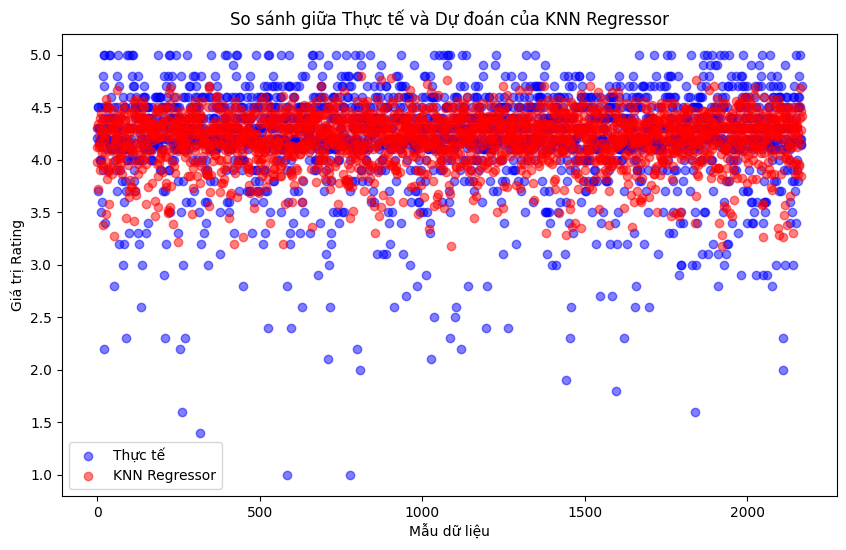

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Tạo dữ liệu giả định
x_values = np.arange(len(y_test))

# Vẽ biểu đồ cho dự đoán của KNN Regressor
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_test, color='blue', label='Thực tế', alpha=0.5)
plt.scatter(x_values, y_pred_knn, color='red', label='KNN Regressor', alpha=0.5)

plt.title('So sánh giữa Thực tế và Dự đoán của KNN Regressor')
plt.xlabel('Mẫu dữ liệu')
plt.ylabel('Giá trị Rating')
plt.legend()
plt.show()


**Linear Regressor**

In [39]:
from sklearn.linear_model import LinearRegression

# Tạo mô hình Linear Regressor
linear_regressor = LinearRegression()

# Đào tạo mô hình
linear_regressor.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_linear = linear_regressor.predict(X_test)

# Đánh giá hiệu suất bằng MSE
mse_linear = mean_squared_error(y_test, y_pred_linear)
print('Bình phương Sai trung bình cho Linear Regressor (tập kiểm tra):', mse_linear)


Bình phương Sai trung bình cho Linear Regressor (tập kiểm tra): 0.22142778140704264


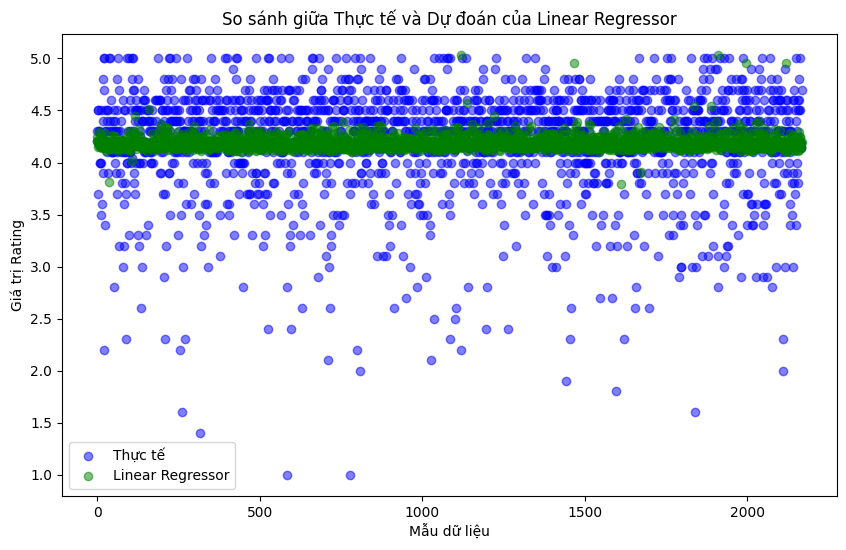

In [40]:
# Vẽ biểu đồ cho dự đoán của Linear Regressor
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_test, color='blue', label='Thực tế', alpha=0.5)
plt.scatter(x_values, y_pred_linear, color='green', label='Linear Regressor', alpha=0.5)

plt.title('So sánh giữa Thực tế và Dự đoán của Linear Regressor')
plt.xlabel('Mẫu dữ liệu')
plt.ylabel('Giá trị Rating')
plt.legend()
plt.show()


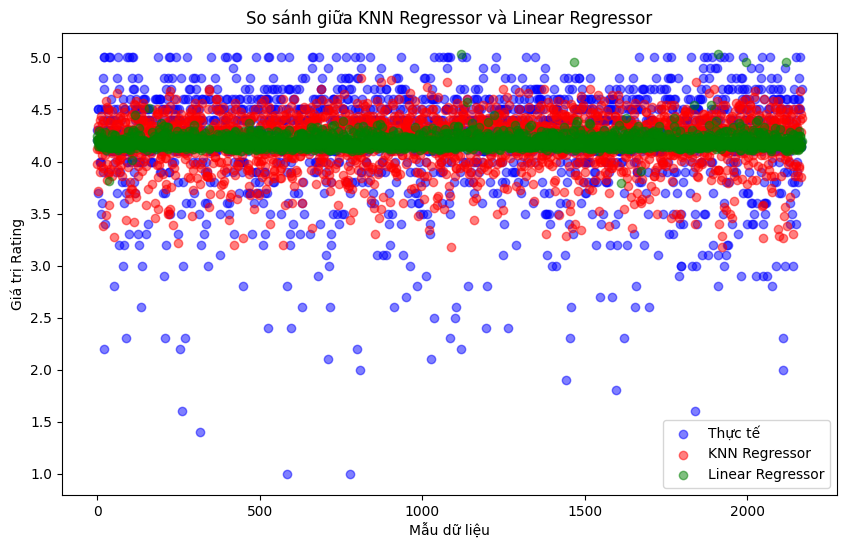

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Tạo dữ liệu giả định
x_values = np.arange(len(y_test))

# Vẽ biểu đồ so sánh giữa dự đoán của KNN Regressor và Linear Regressor
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_test, color='blue', label='Thực tế', alpha=0.5)
plt.scatter(x_values, y_pred_knn, color='red', label='KNN Regressor', alpha=0.5)
plt.scatter(x_values, y_pred_linear, color='green', label='Linear Regressor', alpha=0.5)

plt.title('So sánh giữa KNN Regressor và Linear Regressor')
plt.xlabel('Mẫu dữ liệu')
plt.ylabel('Giá trị Rating')
plt.legend()
plt.show()


**So Sánh độ chệnh lệch dự đoán**


In [42]:
import pandas as pd

# Tạo DataFrame với giá trị thực và dự đoán của cả ba mô hình
comparison_df = pd.DataFrame({
    'Thực tế': y_test,
    'KNN Regressor': y_pred_knn,
    'Linear Regressor': y_pred_linear,
    'Random Forest': randomf.predict(X_test)
})

# Hiển thị bảng so sánh
print(comparison_df)


        Thực tế  KNN Regressor  Linear Regressor  Random Forest
6487   4.210453       4.119247          4.205207       3.211234
2519   4.300000       3.974013          4.240954       3.744712
2815   4.500000       3.720000          4.148737       4.225000
9756   3.700000       4.340000          4.187292       4.003357
2014   4.500000       4.300000          4.209171       4.446333
...         ...            ...               ...            ...
2593   4.200000       4.160000          4.247608       4.205000
6149   4.138725       3.847747          4.140338       4.221384
5208   4.191958       4.460000          4.183614       3.753109
10421  4.145866       4.278875          4.148317       4.167091
2674   4.700000       4.420000          4.201063       4.404000

[2168 rows x 4 columns]


In [43]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Tính toán các chỉ số đánh giá khác nhau
r2_linear = r2_score(y_test, y_pred_linear)
mse_linear = mean_absolute_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))

r2_knn = r2_score(y_test, y_pred_knn)
mse_knn = mean_absolute_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))

r2_random_forest = r2_score(y_test, randomf.predict(X_test))
mse_random_forest = mean_absolute_error(y_test, randomf.predict(X_test))
rmse_random_forest = np.sqrt(mean_squared_error(y_test, randomf.predict(X_test)))

# Thêm các chỉ số đánh giá vào DataFrame
evaluation_df = pd.DataFrame()
evaluation_df['R-squared'] = [r2_linear, r2_knn, r2_random_forest]
evaluation_df['MSE'] = [mse_linear, mse_knn, mse_random_forest]
evaluation_df['RMSE'] = [rmse_linear, rmse_knn, rmse_random_forest]

# Hiển thị DataFrame so sánh
print("Chỉ số đánh giá hiệu suất giữa các mô hình:")
print(evaluation_df)

Chỉ số đánh giá hiệu suất giữa các mô hình:
   R-squared       MSE      RMSE
0   0.013984  0.308633  0.470561
1  -0.055138  0.334874  0.486776
2   0.160547  0.282864  0.434182
